<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a  href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV


In [2]:
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
display(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [3]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
display(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [4]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
display(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


В задании: "Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. Исходный датасет содержит обучающую и тестовую выборки со всеми признаками."     

Наши таргеты:  
эффективность обогащения чернового концентрата rougher.output.recovery;  
эффективность обогащения финального концентрата final.output.recovery.

**Задание 1.2.** Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы. 


С - 'rougher.output.concentrate_au'
F - 'rougher.input.feed_au'
T - 'rougher.output.tail_au'

In [8]:
check_recovery = ((data_train['rougher.output.concentrate_au'] * (data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au']))
                                                              / (data_train['rougher.input.feed_au'] * (data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au']))) * 100
print(check_recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


In [9]:
target = check_recovery
features =  pd.DataFrame(data=data_train, columns=['rougher.output.recovery'])
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(mean_absolute_error(target_valid, predicted_valid))

1.0176144833511667e-14


Вывод: Мы видим, что "Средняя абсолютная ошибка" стремится к нулю, а значит эффективность обогащения рассчитана правильно.

**Задание 1.3.** Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [10]:
 data_full.columns.tolist()

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.s

In [11]:
 data_test.columns.tolist()

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

В тестовой выборке у нас отсутсвуют финальные параметры продукта (final.output.), парметры продукта после флотации (rougher.output.) и расчетные характеристики флотации (rougher.calculation.), т.к "Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже". А все те признаки, которые есть в тесте, они будут доступны в продакшене.  
Получается модель нужно будет обучать по тем признакам, которые есть в тесте, а значит при обучении модели, часть признаков из трейна надо будет убрать. Но в тест нам надо добавить как раз только таргенты (rougher.output.recovery и final.output.recovery), чтобы измерить качество работы модели. 

Уберем сразу признаки, которые лишние из трейна. А к тесту добавим таргеты.  
Но сначала избавимся от пропусков, так как по условию написано что соседние данные похожи, то используем "ffill".

In [12]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [13]:
print(data_test.shape)

(5290, 53)


In [14]:
data_test = data_test.ffill(axis = 0)
print(data_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [15]:
data_train = data_train.ffill(axis = 0)
print(data_train.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [16]:
#сначала добавим к тесту таргеты из полного датасета
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

In [17]:
print(data_test.shape)

(5290, 55)


In [18]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Столбец date нам в качестве признака навряд ли понадобится, можно его удалить. 

In [19]:
data_test = data_test.drop(columns=['date'], axis= 1)

In [20]:
print(data_test.shape)

(5290, 54)


In [21]:
#уберем из трейна признаки
data_train = data_train[data_test.columns]
print(data_train.shape)

(14149, 54)


## Анализ данных

**Задание 2.1.** Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.   
  
Надо рассмотреть'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au' - концентрация металлов на первичной очистке, и 'final.output.concentrate_ag',
'final.output.concentrate_pb','final.output.concentrate_au' - концентрация металлов на вторичной очистке (финальной). 

In [22]:
data_au = data_full.pivot_table(index=['primary_cleaner.output.concentrate_au'], values=['final.output.concentrate_au', 'rougher.output.concentrate_au'])
data_au = data_au.reset_index()
data_au['primary_cleaner.output.concentrate_au'] = data_au['primary_cleaner.output.concentrate_au'].round(0)
data_au['rougher.output.concentrate_au'] = data_au['rougher.output.concentrate_au'].round(0)
data_au['final.output.concentrate_au'] = data_au['final.output.concentrate_au'].round(0)
print(data_au)

       primary_cleaner.output.concentrate_au  final.output.concentrate_au  \
0                                        0.0                         41.0   
1                                        0.0                         44.0   
2                                        0.0                         38.0   
3                                        0.0                         48.0   
4                                        0.0                         43.0   
...                                      ...                          ...   
19194                                   44.0                         49.0   
19195                                   45.0                         19.0   
19196                                   45.0                         50.0   
19197                                   45.0                         49.0   
19198                                   46.0                         50.0   

       rougher.output.concentrate_au  
0                               18.0

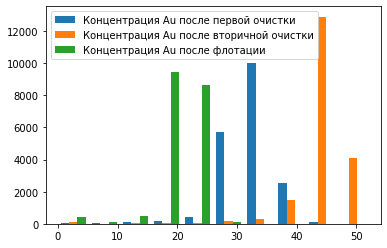

In [23]:
plt.hist(data_au, bins=10)
plt.legend(('Концентрация Au после первой очистки', 'Концентрация Au после вторичной очистки', 'Концентрация Au после флотации'), loc='upper left')

Концентрация золота после вторичной очистки стало всех больше. Тут четко видно, как все этапы идут друг за другом. Какая красота.

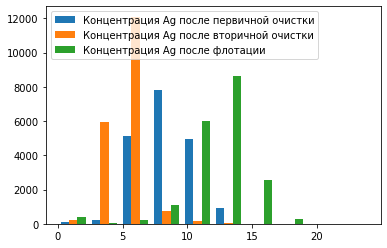

In [24]:
data_ag = data_full.pivot_table(index=['primary_cleaner.output.concentrate_ag'], values=['final.output.concentrate_ag', 'rougher.output.concentrate_ag'])
data_ag = data_ag.reset_index()
data_ag['primary_cleaner.output.concentrate_ag'] = data_ag['primary_cleaner.output.concentrate_ag'].round(0)
data_ag['rougher.output.concentrate_ag'] = data_ag['rougher.output.concentrate_ag'].round(0)
data_ag['final.output.concentrate_ag'] = data_ag['final.output.concentrate_ag'].round(0)
#print(data_ag)
plt.hist(data_ag, bins=10)
plt.legend(('Концентрация Ag после первичной очистки', 'Концентрация Ag после вторичной очистки', 'Концентрация Ag после флотации'), loc='upper left')

Тут же после очистки серебро с самой большой концетрацией 6, но после первичной очистки, мы имеем много значений с концентрацией 9, а так же 10. При этом такая большая концентрация после вторичной чистки начинает падать, и концентрации 9 у серебра почти нет. В черновом концентрации (после флотации) мы имеем большую концентрацию серебра (около 14), но таких значений не очень много. Выходит мы имеем больше всего значений после вторичной обработки с концентрацией 6.

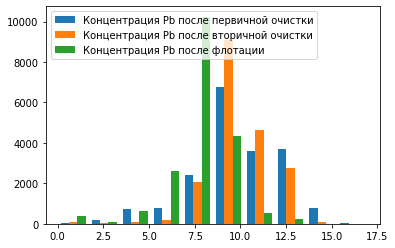

In [25]:
data_pb = data_full.pivot_table(index=['primary_cleaner.output.concentrate_pb'], values=['final.output.concentrate_pb', 'rougher.output.concentrate_pb'])
data_pb = data_pb.reset_index()
data_pb['primary_cleaner.output.concentrate_pb'] = data_pb['primary_cleaner.output.concentrate_pb'].round(0)
data_pb['rougher.output.concentrate_pb'] = data_pb['rougher.output.concentrate_pb'].round(0)
data_pb['final.output.concentrate_pb'] = data_pb['final.output.concentrate_pb'].round(0)
#print(data_pb)
plt.hist(data_pb, bins=10)
plt.legend(('Концентрация Pb после первичной очистки', 'Концентрация Pb после вторичной очистки', 'Концентрация Pb после флотации'), loc='upper left')

После первичной обработки у свинца повысилась концентрация, и такого свинца (с концентрацией 10), вышло больше чем в первичную обработку. Черновой концентрат (после флотации смесь) содержала в основном концентрацию 8, а уже выше концетрации мало. 

**Задание 2.2.**  Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.   

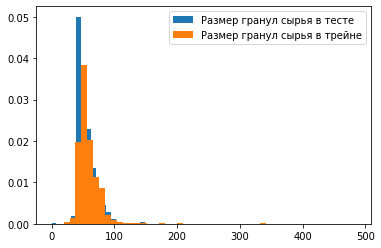

In [26]:
#data['rougher.input.feed_size']
plt.hist(data_test['rougher.input.feed_size'], bins=50, density=True)
plt.hist(data_train['rougher.input.feed_size'], bins=50, density=True)
plt.legend(('Размер гранул сырья в тесте', 'Размер гранул сырья в трейне'), loc='upper right')
#x, bins=None, range=None, density=False

Ну можно сказать что на глаз гранулы сырья более менее распределены похоже.

**Задание 2.3.** Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.   
(rougher.input.feed, rougher.output.concentrate и final.output.concentrate)
rougher.input.feed_ag                         
rougher.input.feed_pb                                 
rougher.input.feed_au    

In [27]:
data_full['sum_concentrate_rougher_in'] = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_au']
data_full['sum_concentrate_rougher_out'] = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_au']
data_full['sum_concentrate_final_out'] = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_au']


In [28]:
print((data_full['sum_concentrate_rougher_in'].loc[data_full['sum_concentrate_rougher_in'] == 0].count()))

0


In [29]:
print((data_full['sum_concentrate_rougher_out'].loc[data_full['sum_concentrate_rougher_out'] == 0].count()))

394


In [30]:
print((data_full['sum_concentrate_final_out'].loc[data_full['sum_concentrate_final_out'] == 0].count()))

98


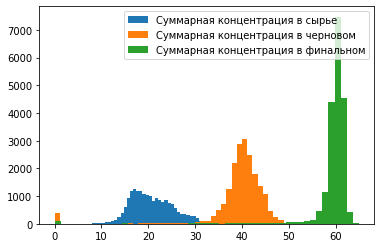

In [31]:
plt.hist(data_full['sum_concentrate_rougher_in'], bins=50) #density=True)
plt.hist(data_full['sum_concentrate_rougher_out'], bins=50) #density=True)
plt.hist(data_full['sum_concentrate_final_out'], bins=50) #density=True)
plt.legend(('Cуммарная концентрация в сырье', 'Cуммарная концентрация в черновом', 'Cуммарная концентрация в финальном'), loc='upper right')
plt.show()

## Модель

ответ: Возможны оба варианта. Можно обучить одну модель, которая предсказывает сразу 2 таргета. А можно обучить 2 отдельные модели, каждый из которых предсказывает свой таргет. Тут уже тебе решать, как сделать.
Можно попробовать оба варианта и выбрать тот, который приводит к лучшем качеству. 

**Задание 3.1.** Напишите функцию для вычисления итоговой sMAPE.

In [35]:
def calculate_smape(target, predictions):
    numerator = np.abs(target - predictions)
    denominator = (np.abs(target) + np.abs(predictions)) / 2 

    return 1 / len(target) * np.sum(numerator / denominator) * 100 

In [36]:
def smape_total(smape_rougher, smape_final):
    smape_final = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_final


**Задание 3.2.** Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [37]:
data_test.shape

(5290, 54)

In [38]:
data_train.shape

(14149, 54)

Наши таргеты:  
эффективность обогащения чернового концентрата rougher.output.recovery;  
эффективность обогащения финального концентрата final.output.recovery.

**Линейная ререссия**

In [39]:
# линейная регрессия для таргета rougher.output.recovery на тестовой выборке с применением кросс-валидации
#%%time

features = features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_train['rougher.output.recovery']

#Промастабируем признаки
scaler_train = StandardScaler()
scaler_train.fit(features)
features = scaler_train.transform(features)

scorer = make_scorer(calculate_smape, greater_is_better=False)

model_linear_rougher = LinearRegression()
model_linear_rougher.fit(features, target)
rougher_scores = cross_val_score(model_linear_rougher, features, target.values, scoring=scorer, cv=5)
final_score_rougher = rougher_scores.mean() 
print('Средняя оценка качества модели (по sMAPE)=', final_score_rougher)


Средняя оценка качества модели (по sMAPE)= -12.802483458481987


In [40]:
# линейная регрессия для таргета final.output.recovery на тестовой выборке с применением кросс-валидации

features = features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_train['final.output.recovery']

#Промастабируем признаки
scaler_train = StandardScaler()
scaler_train.fit(features)
features = scaler_train.transform(features)

scorer = make_scorer(calculate_smape, greater_is_better=False)

model_linear_final = LinearRegression()
model_linear_final.fit(features, target)
rougher_scores = cross_val_score(model_linear_final, features, target.values, scoring=scorer, cv=5)
final_score_final = rougher_scores.mean() 
print('Средняя оценка качества модели (по sMAPE)=', final_score_final)

Средняя оценка качества модели (по sMAPE)= -12.245300320302261


Рассчитаем итоговую sMAPE.

In [41]:
result_linear = smape_total(final_score_rougher, final_score_final)
print('Итоговая sMAPE дерева решений', result_linear)

Итоговая sMAPE дерева решений -12.384596104847192


**Дерево решений**

In [43]:
#дерево решений, таргет rougher.output.recovery на тесте
features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_train['rougher.output.recovery']

#Промастабируем признаки
scaler_train = StandardScaler()
scaler_train.fit(features)
features = scaler_train.transform(features)

#подберем лучшую модель используя GridSearchCV
model = DecisionTreeRegressor(random_state=12345)
param = {'max_depth': range(1,10)}
grid = GridSearchCV(model, param, cv=5, scoring=make_scorer(calculate_smape, greater_is_better=False))
grid.fit(features, target) 
print(grid.best_params_)

{'max_depth': 4}


In [44]:
model_tree_rougher =  DecisionTreeRegressor(random_state=12345, max_depth = 4)
model_tree_rougher.fit(features, target)
rougher_scores = cross_val_score(model_tree_rougher, features, target.values, scoring=scorer, cv=5)
final_score_rougher = rougher_scores.mean() 
print('Средняя оценка качества модели (по sMAPE)=', final_score_rougher)

Средняя оценка качества модели (по sMAPE)= -11.579887512182543


In [45]:
#дерево решений, таргет final.output.recovery на тесте
features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_train['final.output.recovery']

#Промастабируем признаки
scaler_train = StandardScaler()
scaler_train.fit(features)
features = scaler_train.transform(features)

#подберем лучшую модель используя GridSearchCV
model = DecisionTreeRegressor(random_state=12345)
param = {'max_depth': range(1,10)}
grid = GridSearchCV(model, param, cv=5, scoring=make_scorer(calculate_smape, greater_is_better=False))
grid.fit(features, target) 
print(grid.best_params_)

{'max_depth': 3}


In [46]:
model_tree_final =  DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_tree_final.fit(features, target)
rougher_scores = cross_val_score(model_tree_final, features, target.values, scoring=scorer, cv=5)
final_score_final = rougher_scores.mean() 
print('Средняя оценка качества модели (по sMAPE)=', final_score_final)

Средняя оценка качества модели (по sMAPE)= -10.806104806167777


Рассчитаем итоговую sMAPE.

In [47]:
result_tree = smape_total(final_score_rougher, final_score_final)
print('Итоговая sMAPE дерева решений', result_tree)

Итоговая sMAPE дерева решений -10.999550482671468


Создадим константную модель. 

In [48]:
def calculate_smape(target, predictions):
    numerator = np.abs(target - predictions)
    denominator = (np.abs(target) + np.abs(predictions)) / 2 

    return 1 / len(target) * np.sum(numerator / denominator) * 100 

predicted_random = pd.Series(target.mean(), index=target.index)
result = calculate_smape(target, predicted_random)
print('константная модель для final.output.recovery', result)

константная модель для final.output.recovery 11.116270685529766


**Случайный лес**

In [49]:
%%time
#случайный лес для таргета rougher.output.recovery на тесте
features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_train['rougher.output.recovery']

#Промастабируем признаки
scaler_train = StandardScaler()
scaler_train.fit(features)
features = scaler_train.transform(features)

#подберем лучшую модель используя GridSearchCV
model = RandomForestRegressor(random_state=12345)
param = {'max_depth': range(10, 15),
        'n_estimators': range(15, 20)}
grid = GridSearchCV(model, param, cv=3, scoring=make_scorer(calculate_smape, greater_is_better=False))
grid.fit(features, target) 
print(grid.best_estimator_)

RandomForestRegressor(max_depth=10, n_estimators=17, random_state=12345)
CPU times: user 6min 35s, sys: 507 ms, total: 6min 35s
Wall time: 6min 36s


In [50]:
%%time
model_forest_rougher = RandomForestRegressor(random_state=12345, max_depth = 10, n_estimators=17)
model_forest_rougher.fit(features, target)
rougher_scores = cross_val_score(model_forest_rougher, features, target.values, scoring=scorer, cv=3)
final_score_rougher = rougher_scores.mean() 
print('Средняя оценка качества модели (по sMAPE)=', final_score_rougher)

Средняя оценка качества модели (по sMAPE)= -13.145774667705792
CPU times: user 20.7 s, sys: 12.1 ms, total: 20.7 s
Wall time: 20.7 s


In [51]:
%%time
#случайный лес для таргета final.output.recovery на тесте
features = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target = data_train['final.output.recovery']

#Промастабируем признаки
scaler_train = StandardScaler()
scaler_train.fit(features)
features = scaler_train.transform(features)

#подберем лучшую модель используя GridSearchCV
model = RandomForestRegressor(random_state=12345)
param = {'max_depth': range(10, 15),
        'n_estimators': range(15, 20)}
grid = GridSearchCV(model, param, cv=3, scoring=make_scorer(calculate_smape, greater_is_better=False))
grid.fit(features, target) 
print(grid.best_estimator_)

RandomForestRegressor(max_depth=13, n_estimators=15, random_state=12345)
CPU times: user 6min 21s, sys: 269 ms, total: 6min 22s
Wall time: 6min 22s


In [52]:
%%time
model_forest_final = RandomForestRegressor(random_state=12345, max_depth = 13, n_estimators= 15)
model_forest_final.fit(features, target)
rougher_scores = cross_val_score(model_forest_final, features, target.values, scoring=scorer, cv=3)
final_score_rougher = rougher_scores.mean() 
print('Средняя оценка качества модели (по sMAPE)=', final_score_rougher)

Средняя оценка качества модели (по sMAPE)= -12.06794958011433
CPU times: user 21.8 s, sys: 16 ms, total: 21.8 s
Wall time: 21.9 s


Рассчитаем итоговую sMAPE.

In [54]:
result_forest = smape_total(final_score_rougher, final_score_final)
print('Итоговая sMAPE дерева решений', result_forest)

Итоговая sMAPE дерева решений -11.121565999654415


**Вывод:** Провела исследование на трех разных моделях. Самый лучший показатель по итоговой sMAPE у дерева решений, ее я и взяла для финальной проверки на тестовой выборке (sMAPE = -10.9). 
